This notebook taken in the life expectancy dataset provided by WHO and makes a prediction on the age expectancy.

# Importing Libraries

In [73]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e82115e60190430192f7ed7daaf62729 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pmsVLrhyFpgYA9dBszLvp9t-44xJ-3V6JFL2tpGEimfi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e82115e60190430192f7ed7daaf62729.get_object(Bucket='lifeexpectancy-donotdelete-pr-ynwp4dakfs38jg',Key='Lifedata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [74]:
df =df.drop(['Status'], axis=1)
df = df.drop(['Year'], axis=1)

In [75]:
df.head()

,Country,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [76]:
df = df.groupby('Country').mean()

In [77]:
df.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,58.19375
Albania,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,75.15625
Algeria,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,73.61875
Angola,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,49.01875
Antigua and Barbuda,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,75.05625


# Data Visualization

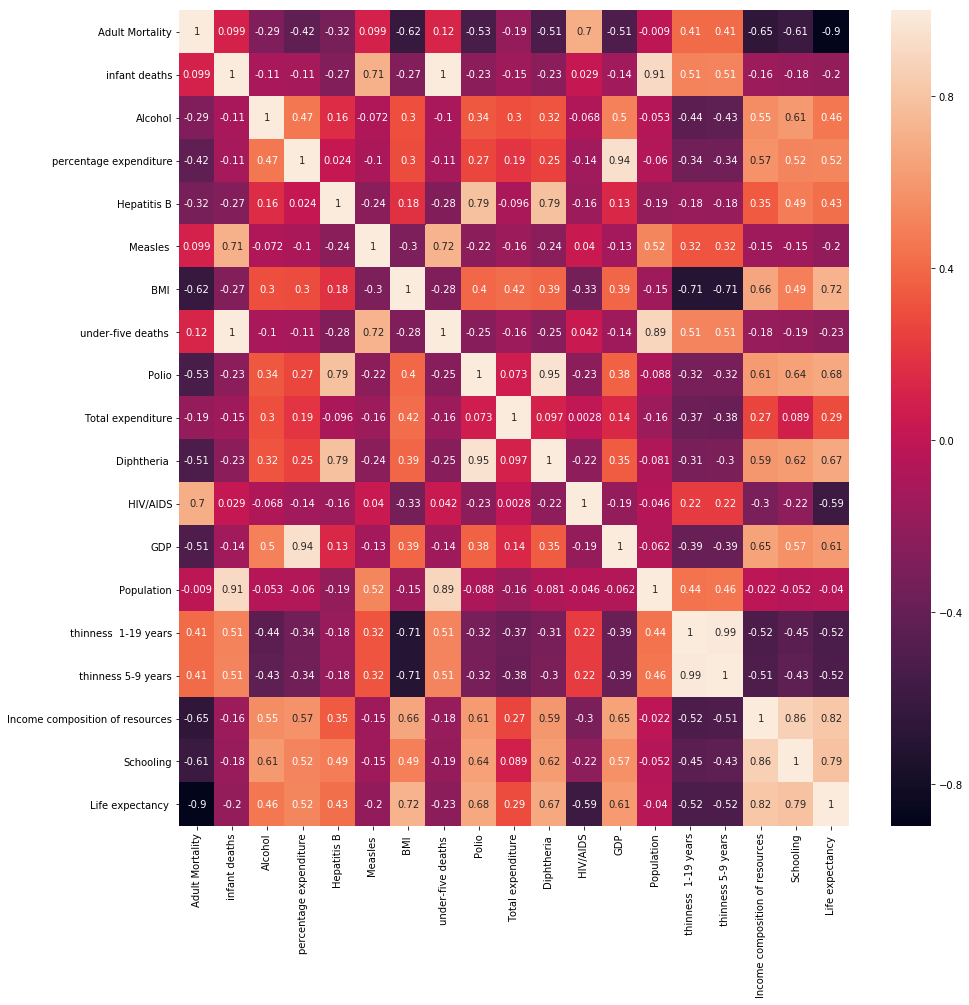

In [78]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

In [79]:
Y = df['Life expectancy ']
X = df.drop('Life expectancy ', axis = 1)

In [80]:
X.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
dtype: int64

# Replacing NaN Values

In [81]:
X.fillna(value = X.mean(), inplace = True)
Y.fillna(value = Y.mean(), inplace = True)

# Rescaling

In [82]:
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

# Splitting Data

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.7, test_size = 0.3)

# Building the Model

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

#fitting the model
lasso=Lasso(alpha=0,max_iter=10)
lasso.fit(X_train,Y_train)
lasso.predict(X_test)
lasso.score(X_train,Y_train)

0.9234931584917856

In [85]:
lasso.score(X_test,Y_test)

0.9059674200168311

In [96]:
lasso.predict([[ 271.0, 64, 0.01, 73.52358168,
       62.0, 492, 18.6, 86, 58.0, 8.18, 62.0, 0.1, 612.696514, 327582.0,
       17.5, 17.5, 0.47600000000000003, 10.0]])

array([59.16438083])

# Accuracy of Model

In [86]:
rsq
print(prediction)

[69.41537253 64.02650173 69.81204545 58.23550322 81.14262556 72.30126279
 64.1048612  70.29405071 52.32361168 64.59888789 67.36307947 70.76176646
 55.65247162 60.04695402 62.32167044 56.82581836 80.87538276 68.30523304
 54.32956478 74.61869564 76.76208573 62.46829535 78.7718075  37.28793901
 54.47958441 74.01016361 83.04177118 65.0405153  71.89708011 72.60793561
 72.79020673 72.05063283 71.50662555 70.4039273  69.23107857 64.20751049
 76.12775933 74.90654389 56.74502781 77.07494351 61.22359225 70.384893
 68.13417991 70.48205917 79.99928091 46.83267581 50.97411035 67.0399338
 59.26774121]


In [87]:
!pip install watson-machine-learning-client

In [88]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [89]:
wml_credentials={
    "apikey": "h6DbGIe1nB3EEDwggCWgYu1dHoiv5Z6aufmg_Pnh9em5",
    "instance_id": "5971ee95-2fc0-4ece-a0b6-5c7488916ee6",
    "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [90]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [91]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Ojaswita", 
               client.repository.ModelMetaNames.NAME: "LifePrediction"}

In [92]:
model_artifact =client.repository.store_model(lasso, meta_props=model_props)

In [93]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'8a4e6d24-b7a5-4ef0-8d35-66af657ae450'

In [94]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy ")



#######################################################################################

Synchronous deployment creation for uid: '8a4e6d24-b7a5-4ef0-8d35-66af657ae450' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9a0fc572-1618-4e37-a11d-7960b9803fd6'
------------------------------------------------------------------------------------------------




In [95]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/5971ee95-2fc0-4ece-a0b6-5c7488916ee6/deployments/9a0fc572-1618-4e37-a11d-7960b9803fd6/online'